In [1]:
using FEM, PyPlot, Printf

### Additional Part 1: Draw the finite element nodes

In [2]:
# Given a point, find the nearest point in our defined line
Nh = 64    # The number of Spectral element
Np = 4     # The order of polynomial which used to interpolate and integration
N  = Nh*Np - Nh + 1 # Total number of nodes
N_gn = Nh + 1 # Number of global element nodes

# Define Physical Domain
xratio = 1
xavg = 1

x, w, Ldx, L = getLagrange(Np,xratio/Nh)

xref = zeros(N,1)    # grid points of domain
x_gn = zeros(N_gn,1) # positions of global nodes

for i=0:Nh-1
    idx_array = 1+i*(Np-1):i*(Np-1)+Np
    idx_gn = i + 1
    
    # Set x positions 
    term1 = (2 * xratio/Nh * i) + (xratio/Nh)
    xref[idx_array] = x .+ term1
    x_gn[idx_gn] = x[1] + term1
end

x_gn[end] = xref[end]

term1 = xavg - xratio
xref = xref .+ term1
x_gn = x_gn .+ term1
print("Done")

Done

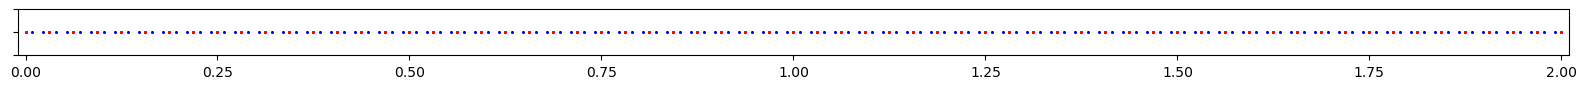

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,1))
s = 1.5
ax.scatter(xref, zeros(size(xref)), s=s, color="blue")
ax.scatter(x_gn, zeros(size(x_gn)), s=s, color="red")
ax.set_ylim(-0.0005, 0.0005)
ax.set_xlim(-0.01, 2.01)
ax.set_yticklabels([])
plt.tight_layout()
#plt.savefig("node_dimensionless.pdf")
plt.show()

In [6]:
gridsize = x_gn[2] - x_gn[1]
s = @sprintf "Grid Size is %1.4f angstrom. " gridsize
println(s)

Grid Size is 0.0313 angstrom. 
